## Set up

In [69]:
import numpy as np
import pandas as pd
import seaborn as sns

import config
from config import LEVELS
from create_full_graph_with_single_query import read_or_create_full_graph

config.set_root_wd()

Working directory: c:\git\pathwayanalysisplatform\proteoformnetworks


In [70]:
graphs_path = "resources/Reactome/"

graphs = { l: read_or_create_full_graph(l, True, graphs_path) for l in LEVELS}
# graphs_no_sm = [read_or_create_full_graph(level, False, graphs_path, v=False) for level in LEVELS]

Reading graph
Graph edges: 457443
Graph nodes: 12789
Graph genes nodes: 10804
Graph small molecule nodes: 1947
Reading graph
Graph edges: 466752
Graph nodes: 12903
Graph proteins nodes: 10902
Graph small molecule nodes: 1963
Reading graph
Graph edges: 679747
Graph nodes: 16040
Graph proteoforms nodes: 14039
Graph small molecule nodes: 1963


In [71]:
print("Number of edges: ")
e = pd.Series([graphs[l].size() for l in LEVELS], index=LEVELS)
v_entities = pd.Series([graphs[l].graph['num_' + l] for l in LEVELS], index=LEVELS)
v_small_molecules = pd.Series([graphs[l].graph['num_small_molecules'] for l in LEVELS], index=LEVELS)

sizes = pd.DataFrame({"Interactions": e, "Accessioned Entities": v_entities, "Simple Entities": v_small_molecules}, index=LEVELS)
sizes.columns.name = "Entity Type"
sizes

Number of edges: 


Entity Type,Interactions,Accessioned Entities,Simple Entities
genes,457443,10804,1947
proteins,466752,10902,1963
proteoforms,679747,14039,1963


In [72]:
# plot_low_level_pathways(figures_path="figures/pathways/", graphs_path="reports/pathways/")


In [73]:
degrees = {l: [graphs[l].degree(n) for n in graphs[l].nodes()] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_mma = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_mma.columns.name = "Entity Type"
degrees_mma

Entity Type,Min,Max,Avg
genes,0,1226,71.536946
proteins,0,1227,72.347826
proteoforms,0,1451,84.756484


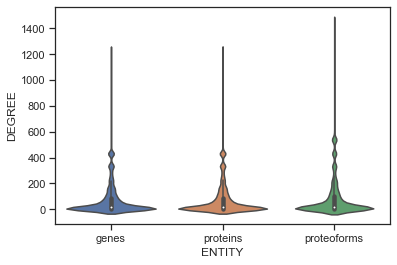

In [74]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

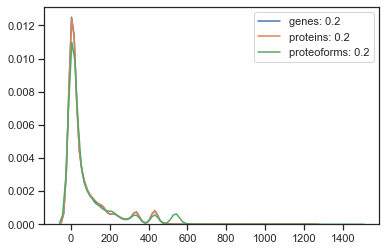

In [75]:
import matplotlib.pyplot as plt

sns.kdeplot(degrees["genes"], label="genes: 0.2")
sns.kdeplot(degrees["proteins"], label="proteins: 0.2")
sns.kdeplot(degrees["proteoforms"], label="proteoforms: 0.2")
plt.legend();

In [76]:
degrees = {l: [graphs[l].degree(n) for n, t in graphs[l].nodes(data='type') if t != "SimpleEntity"] for l in LEVELS}
mins = pd.Series([min(degrees[l]) for l in LEVELS], index=LEVELS)
maxs = pd.Series([max(degrees[l]) for l in LEVELS], index=LEVELS)
avgs = pd.Series([sum(degrees[l])/len(degrees[l]) for l in LEVELS], index=LEVELS)

degrees_df = pd.DataFrame({"Min": mins, "Max": maxs, "Avg": avgs}, index=LEVELS)
degrees_df.columns.name = "Entity Type"
degrees_df

Entity Type,Min,Max,Avg
genes,0,1226,79.982284
proteins,0,1227,80.914958
proteoforms,0,1451,92.907976


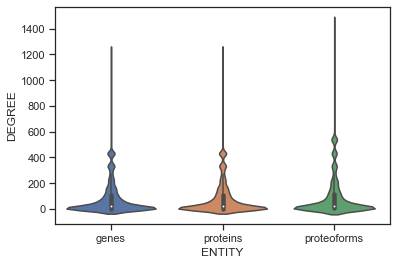

In [77]:
datas = { l: {'ENTITY': np.repeat(l, len(degrees[l])), 'DEGREE': degrees[l]} for l in LEVELS}
degrees_dfs = [pd.DataFrame(datas[l], columns=['ENTITY', 'DEGREE']) for l in LEVELS]

degrees_df = pd.concat(degrees_dfs)
sns.set(style="ticks")
ax = sns.violinplot(x="ENTITY", y="DEGREE", data=degrees_df)

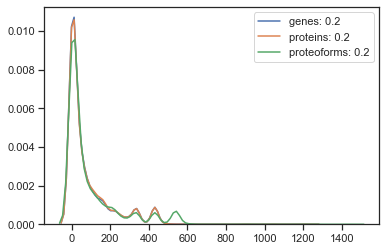

In [78]:
import matplotlib.pyplot as plt

sns.kdeplot(degrees["genes"], label="genes: 0.2")
sns.kdeplot(degrees["proteins"], label="proteins: 0.2")
sns.kdeplot(degrees["proteoforms"], label="proteoforms: 0.2")
plt.legend();

## Bridges and Articulation points

In [79]:
# TODO: Write function that plots and highlights the articulation points of an interaction network.
# TODO: Write function that plots and highlights also the bridges of the network.